# Main Program for Numerical and Categorical Feature
This program combines the models built for both the numerical and categorical features

function ClickConnect(){
console.log("Working");
document.querySelector("colab-connect-button").shadowRoot.getElementById('connect').click()
}
setInterval(ClickConnect,60000)

In [0]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 5

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy as copy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# use tensorflow version 2
%tensorflow_version 2.x

# load the encoder model to be used
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Reshape, Concatenate, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
from tensorflow.keras.layers import PReLU, ReLU, BatchNormalization, ELU
from keras.initializers import Constant
from keras import regularizers


Using TensorFlow backend.


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, explained_variance_score

In [0]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit
# for cross validation, we can use Group KFold spliting - GroupShuffleSplit


In [0]:
import sys
sys.path.append('drive/My Drive/Thesis/Collab Notebooks/')

In [0]:
# using the latest updated file
#data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v3_Sorted_Raw_Db_with_RUL.csv", sep=',', low_memory=False)
#ata = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v4_Sorted_Raw_Db_with_RUL_imputed.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/sorted_data_new_full.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/sorted_data_new.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v5_Sorted_Raw_Db_with_RUL_imputed.csv", sep=',', low_memory=False)
#data2 = pd.read_csv("drive/My Drive/Thesis/data/Embedding_Data/v2_sorted_data_new.csv", sep=',', low_memory=False)


In [0]:
# embedding required data
data = pd.read_csv("/content/drive/My Drive/Thesis/data/Results/thesis overall result.csv", encoding = "utf-8", sep=',', skiprows=0)

In [0]:
data[['Prediction Results (MAE)', 'Performance Improvement (%)', 'Storage Saved (%)']] = data[['Prediction Results (MAE)', 'Performance Improvement (%)', 'Storage Saved (%)']].astype('float')


In [0]:
data['Storage_Used (MB)'] = data['Storage_Used (MB)'].astype('int')

In [13]:
data

,Storage_Used (MB),Number_of_Records,Number_of_Features,Method,Storage Saved (%),Performance Improvement (%),Prediction Results (MAE),Prediction Model
0,807,166958,447,Original data,0.00,0.000000,157.670,Random Forest
1,158,166958,93,Parallel AE Approach,80.42,-3.500000,163.188,Random Forest
2,105,166958,80,Combined AE_80,86.99,-6.790000,168.380,Random Forest
3,69,166958,50,Combined AE_50,91.44,-7.122471,168.900,Random Forest
4,57,166958,40,Combined AE_40,92.93,-8.073825,170.400,Random Forest
5,42,166958,30,Combined AE_30,94.79,-7.788419,169.950,Random Forest
6,28,166958,20,Combined AE_20,96.53,-8.644638,171.300,Random Forest
7,15,166958,10,Combined AE_10,98.14,-9.684785,172.940,Random Forest
8,8,166958,5,Combined AE_5,99.00,-8.403628,170.920,Random Forest
9,2,166958,2,Combined AE_2,99.75,-23.555527,194.810,Random Forest


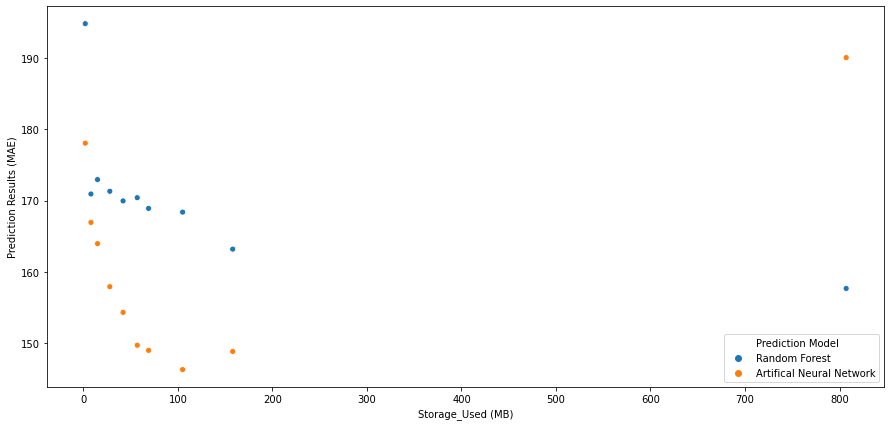

In [14]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Storage_Used (MB)', y='Prediction Results (MAE)', hue='Prediction Model', data=data)

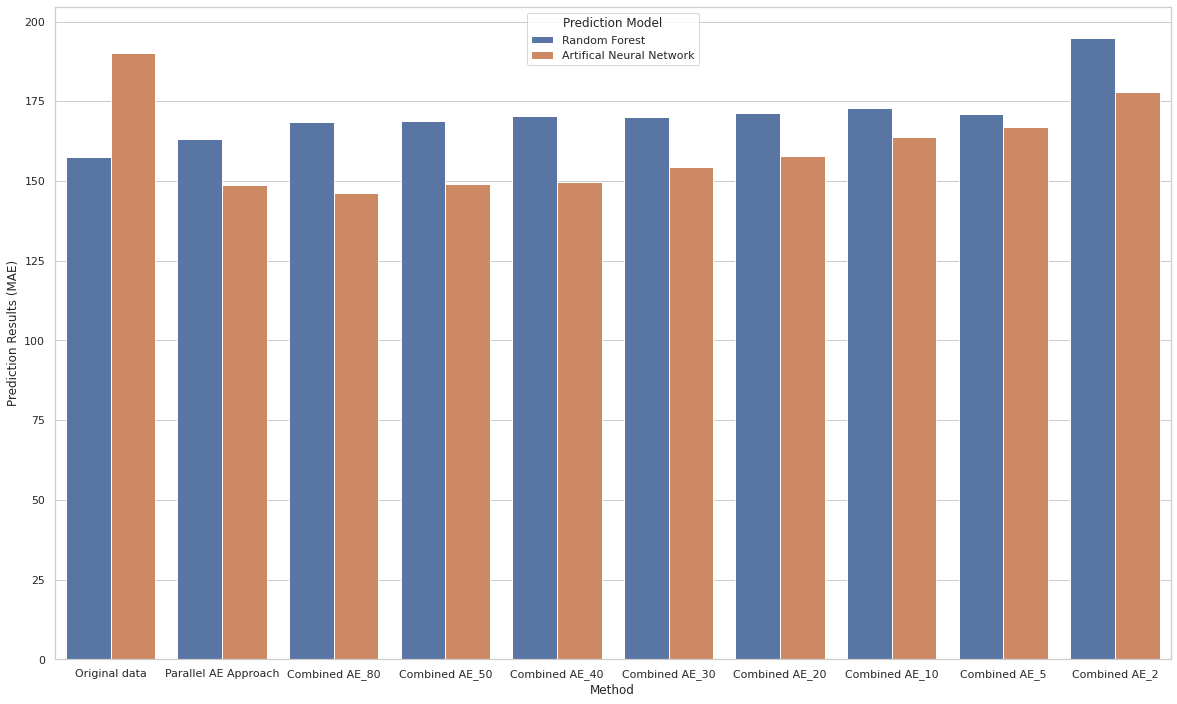

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,12))
sns.barplot(x="Method", y="Prediction Results (MAE)", hue="Prediction Model", data=data)

Text(0.5, 1.0, 'Performance Improvement vs Compression Model')

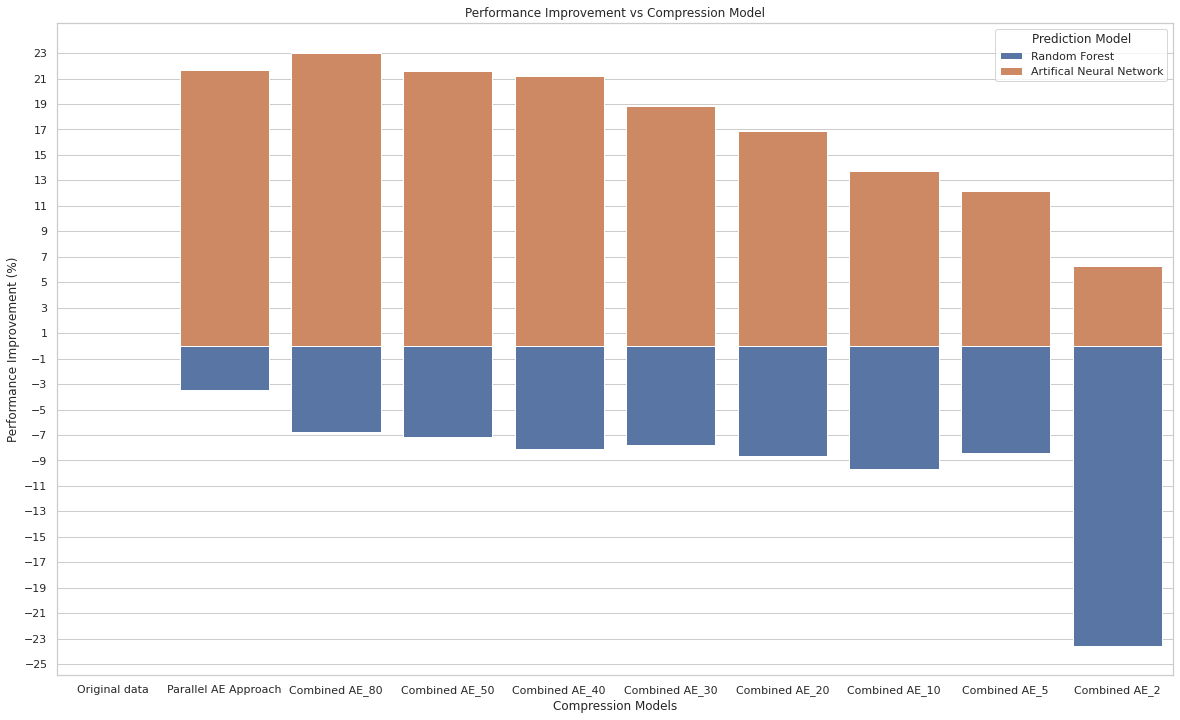

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,12))
sns.barplot(x="Method", y="Performance Improvement (%)", hue="Prediction Model", data=data, dodge=False)
plt.xlabel("Compression Models")
plt.yticks(range(-25, 25, 2))
plt.title("Performance Improvement vs Compression Model")

In [0]:
data_dnn = data[data['Prediction Model'] == 'Artifical Neural Network']

Text(0.5, 1.0, 'Performance Improvement vs Dimensionality Reduction Model Using Deep Network Regressor')

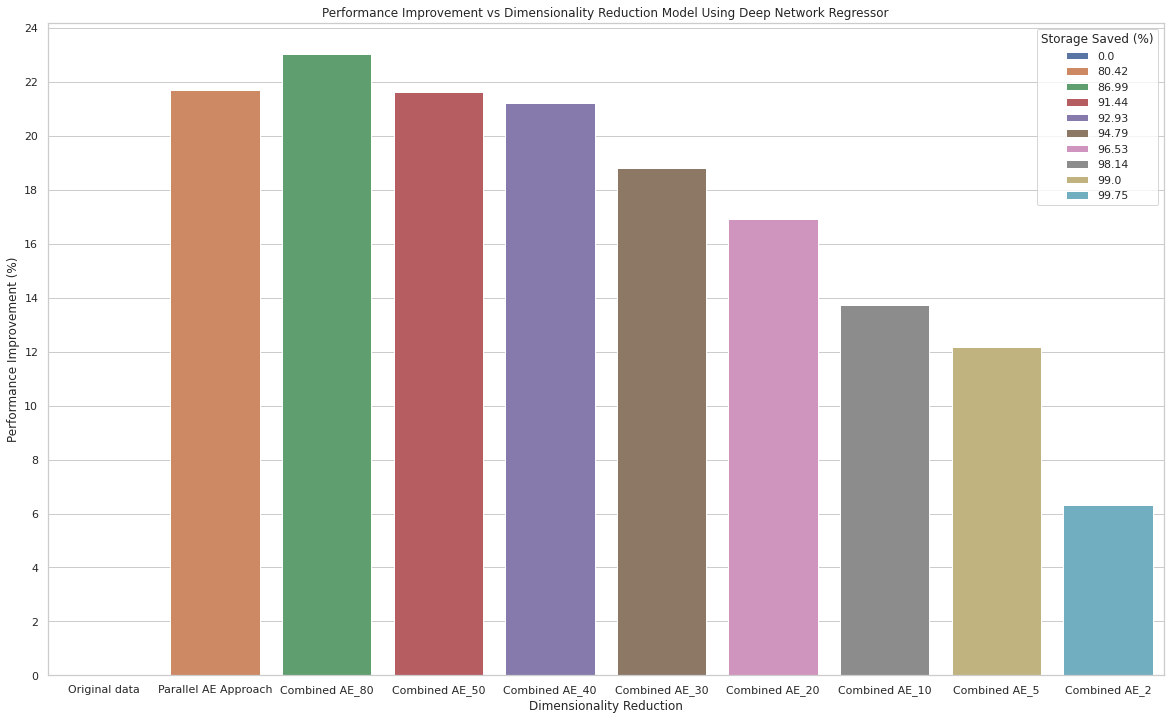

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,12))
sns.barplot(x="Method", y="Performance Improvement (%)", hue="Storage Saved (%)", data=data_dnn, dodge=False)
plt.xlabel("Dimensionality Reduction")
plt.yticks(range(0, 25, 2))
plt.title("Performance Improvement vs Dimensionality Reduction Model Using Deep Network Regressor")

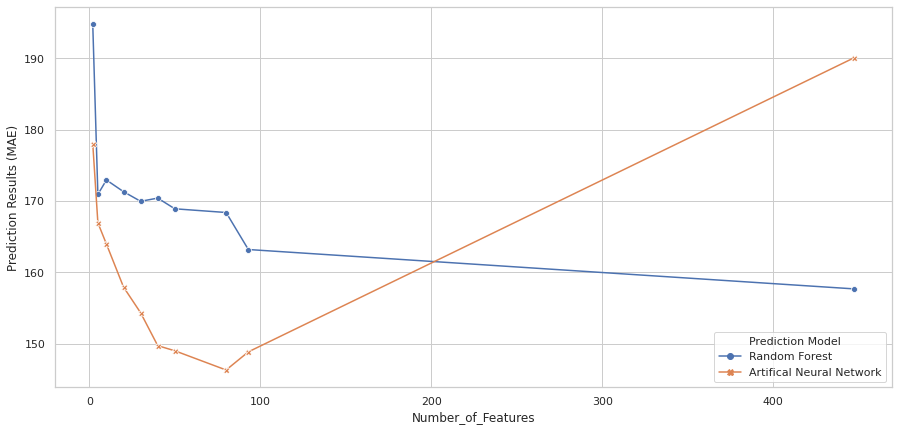

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,7))
sns.lineplot(x="Number_of_Features", y="Prediction Results (MAE)", hue="Prediction Model", style="Prediction Model", markers=True, dashes=False, data=data)

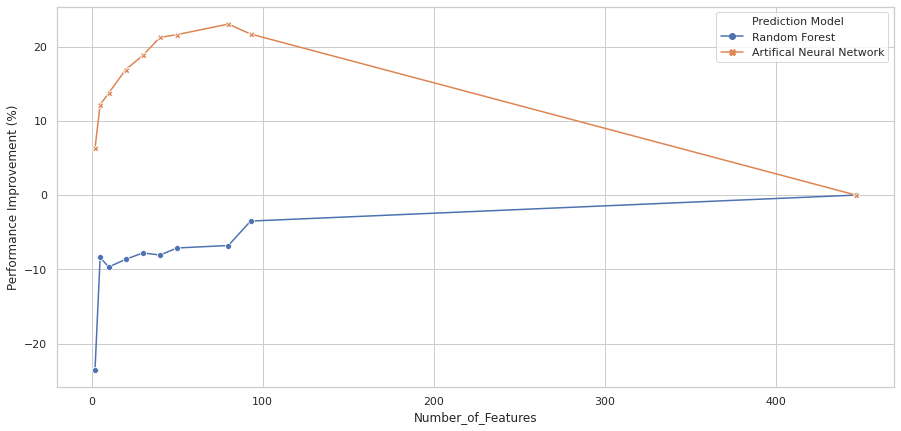

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,7))
sns.lineplot(x="Number_of_Features", y="Performance Improvement (%)", hue="Prediction Model", style="Prediction Model", markers=True, dashes=False, data=data)